
# **CH02 판다스 시작하기**
## 간단한 데이터 시각화

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/gapminder.tsv',sep='\t')
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [3]:
df.groupby('year')['lifeExp'].mean()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

<Axes: xlabel='year'>

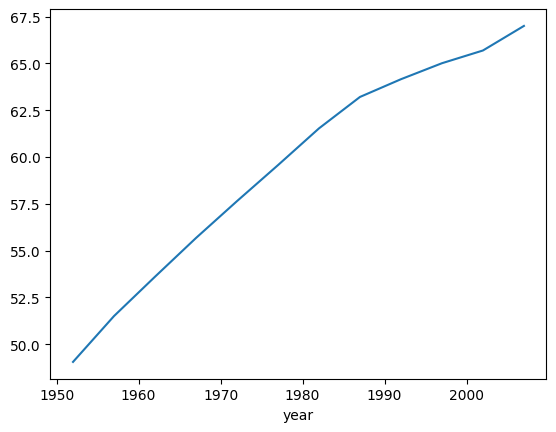

In [5]:
df.groupby('year')['lifeExp'].mean().plot()

---

# **CH03 판다스 데이터 프레임과 시리즈**

## 나만의 데이터 만들기


In [246]:
# Series는 class다.
# index : value 형태 => value = ndarray
# ~ 다른 dtype이 들어올 경우 object(가장 큰 dtype)으로 변환 적용됨
# python에서는 str이 보통 object

s = pd.Series(['banana', 42])
s

0    banana
1        42
dtype: object

In [247]:
s.dtype

dtype('O')

In [9]:
type(s[1])

int

In [5]:
# Series의 named index 지정하기

s = pd.Series(['Wes McKinney','Creator of Pandas'], index=['Person','Who'])
s

Person         Wes McKinney
Who       Creator of Pandas
dtype: object

#### DataFrame 만들기

In [42]:
scientists = pd.DataFrame(
    data={
        'Name' : ['Hong','Park','Kim'],
        'Phonenumber' : ['01011112222','01011113333','01011114444'],
        'Address' : ['Seoul','Busan','Incheon'],
        'Gubun' : [10, 20, 30]
        }
)
scientists

,Name,Phonenumber,Address,Gubun
0,Hong,01011112222,Seoul,10
1,Park,01011113333,Busan,20
2,Kim,01011114444,Incheon,30


In [43]:
scientists.loc[0]

Name                  Hong
Phonenumber    01011112222
Address              Seoul
Gubun                   10
Name: 0, dtype: object

In [44]:
scientists = pd.DataFrame(
    data={
        'Name' : ['Hong','Park','Kim'],
        'Phonenumber' : ['01011112222','01011113333','01011114444'],
        'Address' : ['Seoul','Busan','Incheon'],
        'Gubun' : [10, 20, 30]
        },
    index=['0001', '0002', '0003']
)
scientists

,Name,Phonenumber,Address,Gubun
0001,Hong,01011112222,Seoul,10
0002,Park,01011113333,Busan,20
0003,Kim,01011114444,Incheon,30


In [45]:
scientists['Phonenumber']

0001    01011112222
0002    01011113333
0003    01011114444
Name: Phonenumber, dtype: object

In [46]:
scientists.loc['0001']

Name                  Hong
Phonenumber    01011112222
Address              Seoul
Gubun                   10
Name: 0001, dtype: object

In [47]:
scientists = pd.DataFrame(
    data={
        'Name' : ['Hong','Park','Kim'],
        'Phonenumber' : ['01011112222','01011113333','01011114444'],
        'Address' : ['Seoul','Busan','Incheon'],
        'Gubun' : [10, 20, 30]
        },
    index=['0001','0002','0003'],
    columns=['Name','Phonenumber','Gubun','Address']
    # columns=[] => data={}에서 컬럼명 지정됨(but, 순서보장x)
    #~ 이 속성 사용 시 컬럼의 순서 바꿀 수 있음 :: 순서지정(보장)
)
scientists

,Name,Phonenumber,Gubun,Address
0001,Hong,01011112222,10,Seoul
0002,Park,01011113333,20,Busan
0003,Kim,01011114444,30,Incheon


In [48]:
scientists.loc['0002']

Name                  Park
Phonenumber    01011113333
Gubun                   20
Address              Busan
Name: 0002, dtype: object

### 시리즈 다루기 - 기초

판다스의 데이터를 구성하는 가장 기본단위(작은단위) => 시리즈

In [50]:
# 데이터 프레임에서 시리즈 선택하기 => 컬럼선택

type(scientists.loc['0002'])


pandas.core.series.Series

In [58]:
# 열 추출
scientists['Phonenumber']
# named index : value
# Name: column명

0001    01011112222
0002    01011113333
0003    01011114444
Name: Phonenumber, dtype: object

In [53]:
# 행 추출
scientists.loc['0002']
# index : value
# Name: named inex

Name                  Park
Phonenumber    01011113333
Gubun                   20
Address              Busan
Name: 0002, dtype: object

In [60]:
# keys() 메소드 이용하기 : index속성과 같은 역할
scientists.loc['0002'].keys()

Index(['Name', 'Phonenumber', 'Gubun', 'Address'], dtype='object')

In [70]:
scientists.loc['0002'].keys()[2]

'Gubun'

In [56]:
# index 속성 이용하기
scientists.loc['0002'].index

Index(['Name', 'Phonenumber', 'Gubun', 'Address'], dtype='object')

In [57]:
scientists.loc['0002'].index[2]

'Gubun'

In [52]:
# values 속성 이용하기
scientists.loc['0002'].values

array(['Park', '01011113333', 20, 'Busan'], dtype=object)

In [62]:
scientists

,Name,Phonenumber,Gubun,Address
0001,Hong,01011112222,10,Seoul
0002,Park,01011113333,20,Busan
0003,Kim,01011114444,30,Incheon


#### **브로드캐스팅(Broadcasting)** 

(ndarray의 연산)

- 단순 크기를 나타내는 단일값   = 스칼라
- 여러개 값 가진 데이터         = 벡터
- 벡터의 모음                  = 행렬

=> (스칼라,벡터,행렬)선형대수 => numpy가 선형대수를 다룸

In [63]:
scientists * 2

,Name,Phonenumber,Gubun,Address
0001,HongHong,0101111222201011112222,20,SeoulSeoul
0002,ParkPark,0101111333301011113333,40,BusanBusan
0003,KimKim,0101111444401011114444,60,IncheonIncheon


In [68]:
a = [1,2]   # list
a * 2

[1, 2, 1, 2]

In [69]:
[num * 2 for num in a]

[2, 4]

In [66]:
import numpy as np

arr = np.array([1,2])   # ndarray
arr * 2 

array([2, 4])

#### 시리즈의 기초통계 메소드

In [263]:
ages = pd.Series([37,61])
a = pd.Series([3,4])
ages

0    37
1    61
dtype: int64

In [265]:
ages.append(a)

AttributeError: 'Series' object has no attribute 'append'

In [82]:
ages.mean()

49.0

In [83]:
# 분산 계산

v2 = ((49-37)**2 + (49-61)**2)
v2

288

In [84]:
# 표준편차 계산

ages.std()


16.97056274847714

### 시리즈 다루기 - 응용

#### 시리즈와 **불린 인덱싱**

In [250]:
scientists = pd.read_csv('../data/scientists.csv')
scientists

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist
5,John Snow,1813-03-15,1858-06-16,45,Physician
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


In [97]:
scientists.shape

(8, 5)

In [98]:
# 나이 column 추출

ages = scientists['Age']

In [99]:
ages.max()

90

In [100]:
ages.mean()

59.125

In [103]:
# ages는 시리즈 => 연산 시 브로드캐스팅 일어남 ~ 각각 비교

ages > ages.mean()

0    False
1     True
2     True
3     True
4    False
5    False
6    False
7     True
Name: Age, dtype: bool

In [101]:
ages[ages > ages.mean()]

1    61
2    90
3    66
7    77
Name: Age, dtype: int64

In [105]:
# 길이가 다른 시리즈의 연산(DataFrame 구성에서는 시리즈 길이 모두 같아야만 생성 가능)
# 같은 인덱스값만 연산, 나머지는 NaN 처리

pd.Series([1,100])
ages + pd.Series([1,100])

0     38.0
1    161.0
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
dtype: float64

In [107]:
# sort_index 메소드 사용

ages.sort_index(ascending=False)    # desc

7    77
6    41
5    45
4    56
3    66
2    90
1    61
0    37
Name: Age, dtype: int64

In [112]:
# 시리즈 연산은 "같은 인덱스"끼리 연산되므로 ages*2와 결과가 같다.

print(ages + ages.sort_index(ascending=False))
print(ages*2)

0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64
0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64


### 데이터프레임과 **불린 인덱싱**

In [113]:
scientists[scientists['Age'] > scientists['Age'].mean()]

,Name,Born,Died,Age,Occupation
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


### 시리즈와 데이터프레임의 **데이터 처리하기**

In [116]:
scientists['Born'].dtype

dtype('O')

#### 1. 열의 자료형 바꾸기

In [148]:
born_datetime = pd.to_datetime(scientists['Born'], format='%Y-%m-%d')

In [149]:
died_datetime = pd.to_datetime(scientists['Died'], format='%Y-%m-%d')

#### 2.  데이터프레임의 새로운 열 추가하기

In [150]:
scientists['born_dt'], scientists['died_dt'] = (born_datetime, died_datetime)

In [131]:
scientists.head()

,Name,Born,Died,Age,Occupation,born_dt,died_dt
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12,1910-08-13
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14


In [132]:
scientists.shape

(8, 7)

In [125]:
scientists['Test'] = [1,2,3,4,5,6,7,8]

In [126]:
scientists.head()

,Name,Born,Died,Age,Occupation,born_dt,died_dt,Test
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,1
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,2
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12,1910-08-13,3
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04,4
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14,5


In [151]:
# datetime dtype 계산하기

scientists['age_days'] = (scientists['died_dt'] - scientists['born_dt'])
scientists.head()

,Name,Born,Died,Age,Occupation,born_dt,died_dt,age_days
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,13779 days
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,22404 days
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12,1910-08-13,32964 days
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04,24345 days
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14,20777 days


#### 3. 데이터 섞기

(데이터 학습 시 순차적인 데이터는 학습과정에서 문제가 생길 수 있어 무작위로 섞은 다음 학습 시켜야함)

In [136]:
import random
random.seed(42)
random.shuffle(scientists['Age'])
print(scientists['Age'])

0    61
1    41
2    66
3    56
4    37
5    45
6    77
7    90
Name: Age, dtype: int64


c:\Users\user\anaconda3\envs\pandas-dev\lib\random.py:394: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i], x[j] = x[j], x[i]
c:\Users\user\anaconda3\envs\pandas-dev\lib\random.py:394: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i], x[j] = x[j], x[i]
c:\Users\user\anaconda3\envs\pandas-dev\lib\random.py:394: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i], x[j] = x[j], x[i]
c:\Users\user\anaconda3\envs\pandas-dev\lib\random.p

#### 4. 데이터프레임의 열 삭제하기

* drop() method

        - axis = 0 : 행축(row)
        - axis = 1 : 열축(column)

In [251]:
# column 삭제

#                    삭제한 결과 반환
scientists_dropped = scientists.drop(['Age'],axis=1)

scientists_dropped

,Name,Born,Died,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,Chemist
1,William Gosset,1876-06-13,1937-10-16,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,Nurse
3,Marie Curie,1867-11-07,1934-07-04,Chemist
4,Rachel Carson,1907-05-27,1964-04-14,Biologist
5,John Snow,1813-03-15,1858-06-16,Physician
6,Alan Turing,1912-06-23,1954-06-07,Computer Scientist
7,Johann Gauss,1777-04-30,1855-02-23,Mathematician


In [154]:
scientists.head()

,Name,Born,Died,Age,Occupation,born_dt,died_dt,age_days
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,13779 days
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,22404 days
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12,1910-08-13,32964 days
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04,24345 days
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14,20777 days


#### 5. 데이터 저장하고 불러오기

        1) 피클로 저장하기(to_pickle('.../.pickle')) => read_pickle로 읽어들여야함
        2) csv파일과 tsc파일로 저장하기(to_csv('.../.csv') 
                                    or to_csv('.../.tsv',sep='\t'))

In [155]:
# 2) to_csv

names = scientists['Name']
names.to_csv('../data/scientist_names.csv')

In [158]:
a = pd.DataFrame(
    data = {
        'a' : [1,2,3],
        'b' : [4,5,6]
    }
)
a

,a,b
0,1,4
1,2,5
2,3,6


In [162]:
a.to_csv('../data/a.csv',index=False)

In [163]:
# 저장된 index를 읽을때 column으로 인식하여 'Unnamed:0' column이 새로 생김
# 저장할 때 index=False로 저장하면 인덱스가 따로 저장되지 않음
b = pd.read_csv('../data/a.csv')
b  

,a,b
0,1,4
1,2,5
2,3,6


---

# **CH04 그래프 그리기**

## 01 데이터 시각화

### 앤스콤 4분할 그래프

: 평균, 분산 등의 수칫값이나 상관관계, 회귀선이 같은 데이터들의 그래프

-> 데이터 시각화의 필요성을 강조하기 위해 제공되는 내장데이터(seaborn 라이브러리 내)

In [164]:
import seaborn as sns

ans = sns.load_dataset('anscombe')
ans

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [255]:
import matplotlib.pyplot as plt
%matplotlib inline

In [188]:
dataset_1 = ans[ans['dataset'] == 'I']

In [172]:
dataset_1['x'].mean(),dataset_1['y'].mean()

(9.0, 7.500909090909093)

In [189]:
dataset_2 = ans[ans['dataset'] == 'II']

In [174]:
dataset_2['x'].mean(), dataset_2['y'].mean()

(9.0, 7.50090909090909)

#### 그래프 하나만 그려보기

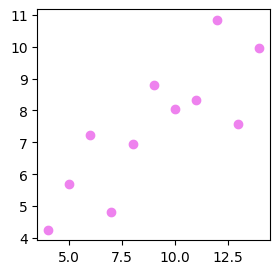

In [256]:
# figure() : 도화지 설정
plt.figure(figsize=(3,3))

# plt.plot(x,y)
plt.plot(dataset_1['x'],dataset_1['y'],'o',color='violet')

plt.show()  # 그래프만 표시하기

In [175]:
dataset_3 = ans[ans['dataset'] == 'III']
dataset_4 = ans[ans['dataset'] == 'IV']

#### **4분할 그래프 그리기**
##### 1) 그래프 틀 만들기

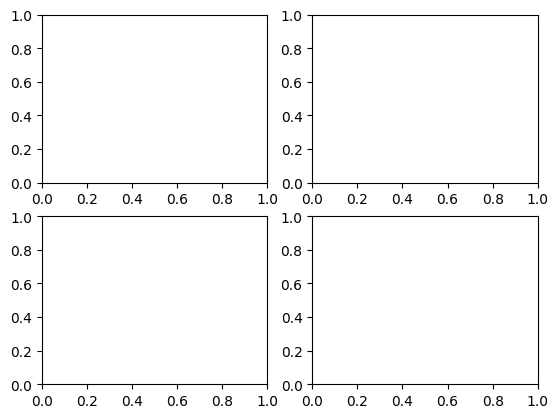

In [192]:
fig = plt.figure()

axes1 = fig.add_subplot(2,2,1)
axes2 = fig.add_subplot(2,2,2)
axes3 = fig.add_subplot(2,2,3)
axes4 = fig.add_subplot(2,2,4)

##### 2) 그래프 그리기

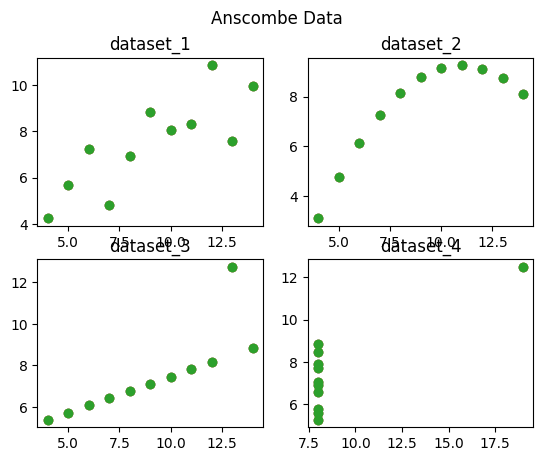

In [196]:
axes1.plot(dataset_1['x'], dataset_1['y'],'o')
axes2.plot(dataset_2['x'], dataset_2['y'],'o')
axes3.plot(dataset_3['x'], dataset_3['y'],'o')
axes4.plot(dataset_4['x'], dataset_4['y'],'o')

fig

##### 3) 그래프 제목 추가하기

In [195]:
axes1.set_title('dataset_1')
axes2.set_title('dataset_2')
axes3.set_title('dataset_3')
axes4.set_title('dataset_4')

fig.suptitle('Anscombe Data')

Text(0.5, 0.98, 'Anscombe Data')

##### 4) 그래프 레이아웃 조절하기

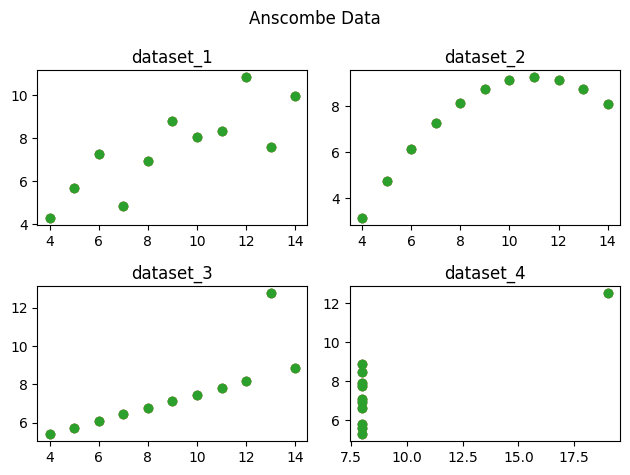

In [198]:
fig.tight_layout()
fig

## 02 matplotlib 라이브러리 자유자재로 사용하기

### 기초 그래프 그리기

In [204]:
# 레스토랑의 요일별 팁 액수
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### ***히스토그램***

: 열 데이터 분포와 빈도를 살펴보는 용도.

: 변수 하나만 사용 = 일변량 그래프

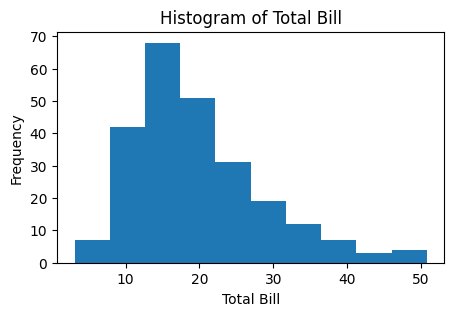

In [275]:
fig = plt.figure(figsize=(5,3))
axes1 = fig.add_subplot(1,1,1)

axes1.hist(tips['total_bill'], bins=10)
axes1.set_title('Histogram of Total Bill')
axes1.set_xlabel('Total Bill')   # 빈도
axes1.set_ylabel('Frequency')

plt.show()

In [274]:
tips['total_bill'].max()

50.81

#### ***산점도***

: 변수 2개 사용 = 이변량 그래프

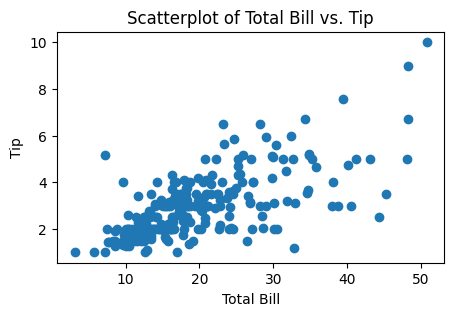

In [223]:
scatter_plot = plt.figure(figsize=(5,3))

axes1 = scatter_plot.add_subplot(1,1,1)
axes1.scatter(tips['total_bill'],tips['tip'])
axes1.set_title('Scatterplot of Total Bill vs. Tip')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

plt.show()

#### ***박스그래프***

: 이산형 변수 & 연속형 변수

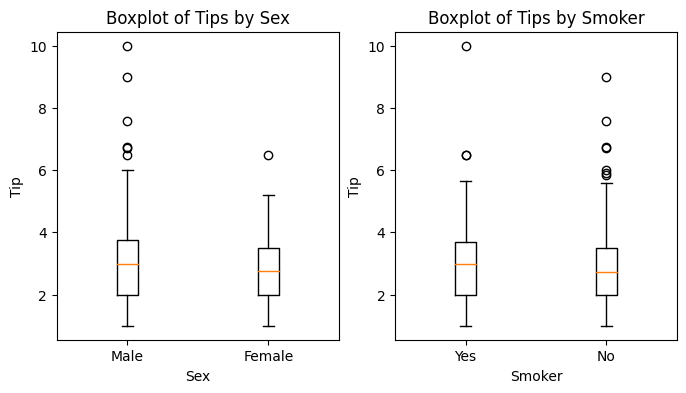

In [245]:
boxplot = plt.figure(figsize=(8,4))
axes1 = boxplot.add_subplot(1,2,1)

axes1.boxplot([tips[tips['sex'] == 'Male']['tip'],
               tips[tips['sex'] == 'Female']['tip']
              ],
               labels=['Male','Female'] # 이산형 변수
               )
axes1.set_xlabel('Sex')
axes1.set_ylabel('Tip')
axes1.set_title('Boxplot of Tips by Sex')


axes2 = boxplot.add_subplot(1,2,2)

axes2.boxplot([tips[tips['smoker'] == 'Yes']['tip'],
               tips[tips['smoker'] == 'No']['tip']],
               labels=['Yes','No']  # 이산형변수
               )
axes2.set_xlabel('Smoker')
axes2.set_ylabel('Tip')
axes2.set_title('Boxplot of Tips by Smoker')

plt.show()

- 남여 모두 팁을 주는 분포는 비슷하나 남자쪽에 이상치가 많은편이고 max가 여자보다 살짝 큰 편이다.
- 


In [266]:
tsq = pd.read_csv('../data/tesla_stock_quandl.csv')
tsq

,Date,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
0,2018-03-27,304.00,304.2700,277.18,279.18,13696168.0,0.0,1.0,304.00,304.2700,277.18,279.18,13696168.0
1,2018-03-26,307.34,307.5900,291.36,304.18,8324639.0,0.0,1.0,307.34,307.5900,291.36,304.18,8324639.0
2,2018-03-23,311.25,311.6100,300.45,301.54,6600538.0,0.0,1.0,311.25,311.6100,300.45,301.54,6600538.0
3,2018-03-22,313.89,318.8200,308.18,309.10,4914307.0,0.0,1.0,313.89,318.8200,308.18,309.10,4914307.0
4,2018-03-21,310.25,322.4400,310.19,316.53,5927881.0,0.0,1.0,310.25,322.4400,310.19,316.53,5927881.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1944,2010-07-06,20.00,20.0000,15.83,16.11,6866900.0,0.0,1.0,20.00,20.0000,15.83,16.11,6866900.0
1945,2010-07-02,23.00,23.1000,18.71,19.20,5139800.0,0.0,1.0,23.00,23.1000,18.71,19.20,5139800.0
1946,2010-07-01,25.00,25.9200,20.27,21.96,8218800.0,0.0,1.0,25.00,25.9200,20.27,21.96,8218800.0
1947,2010-06-30,25.79,30.4192,23.30,23.83,17187100.0,0.0,1.0,25.79,30.4192,23.30,23.83,17187100.0


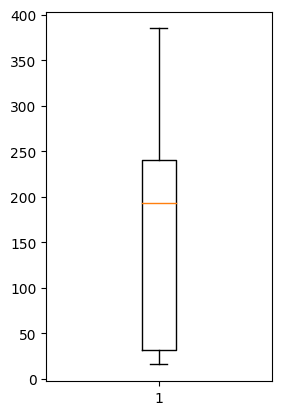

In [273]:
boxplot = plt.figure()
ax = boxplot.add_subplot(1,2,1)

ax.boxplot(tsq['Close'])
plt.show()

#### ***다변량 그래프***